In [1]:
!pip install mplcursors

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors

In [3]:
# lets generate random data which has two features: x1, and x2
# we want the data to be seperable in the space

x = np.random.uniform(0, 3, (100, 2))
x.shape

(100, 2)

In [4]:
x[10]

array([2.28962242, 2.54926079])

In [5]:
# now lets plot the data using two axes: x1 and x2
import plotly.express as px

data = pd.DataFrame({
    'x1': x[:, 0],
    'x2': x[:, 1]
})

fig = px.scatter(data, x='x1', y='x2', hover_data={'x1': True, 'x2': True})
fig.update_layout(width=900, height=700)
fig.show()

In [6]:
# now lets assign y to them
# lets make anything above x1 + x2 = 2 to have y = 1 and anything below that to have y = 0

y = np.zeros(100)
for i in range(100):
    if x[i,0] + x[i, 1] >= 2.4:
        y[i] = 1
    else:
        y[i] = 0

y.shape

(100,)

In [7]:
# now lets color the data based on y
# make it red if y == 1 and blue otherwise
data["y"] = y

fig = px.scatter(data, x='x1', y='x2', color='y',
                 color_continuous_scale=['blue', 'red'],
                 hover_data={'x1': True, 'x2': True, 'y': True})

fig.for_each_trace(lambda t: t.update(name='Red' if t.name == '1' else 'Blue'))
fig.update_layout(width=900, height=700)
fig.show()

In [8]:
class LogisticRegression():
    def __init__(self, w1, w2, b):
        self.w1 = w1
        self.w2 = w2
        self.b = b

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, x):
        return self.sigmoid(self.w1 * x[:,0] + self.w2 * x[:,1] + self.b)

In [9]:
lgr = LogisticRegression(1, 1, 2)

y_pred = lgr.predict(x)
y_pred.shape

(100,)

In [10]:
# define loss function for the entire batch
def cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

cross_entropy(y, y_pred)

1.3150071165482204

In [11]:
def compute_gradients(y_true, y_pred, x):
    dw1 = np.mean((y_pred - y_true) * x[:,0])
    dw2 = np.mean((y_pred - y) * x[:,1])
    db = np.mean((y_pred - y))

    return dw1, dw2, db

In [32]:
def run_gradient_decent(model, x, y, epochs, learning_rate):
    losses = []
    for epoch in range(epochs):
      y_pred = model.predict(x)
      loss = cross_entropy(y, y_pred)
      dw1, dw2, db = compute_gradients(y, y_pred, x)
      model.w1 -= learning_rate * dw1
      model.w2 -= learning_rate * dw2
      model.b -= learning_rate * db

      #if epoch % 5 == 0:
        #print(f"Epoch: {epoch}, Loss: {loss}")

      losses.append(loss)

    return losses

In [33]:
run_gradient_decent(lgr, x, y, 500, 0.001)

[1.1779229204972927,
 1.1776558661799679,
 1.1773888446958845,
 1.1771218560741408,
 1.1768549003438555,
 1.1765879775341685,
 1.1763210876742416,
 1.1760542307932578,
 1.17578740692042,
 1.1755206160849547,
 1.175253858316108,
 1.1749871336431474,
 1.1747204420953623,
 1.174453783702063,
 1.1741871584925807,
 1.1739205664962689,
 1.1736540077425013,
 1.1733874822606731,
 1.1731209900802022,
 1.172854531230525,
 1.1725881057411025,
 1.1723217136414137,
 1.1720553549609625,
 1.1717890297292706,
 1.1715227379758826,
 1.1712564797303653,
 1.1709902550223048,
 1.1707240638813103,
 1.170457906337011,
 1.1701917824190589,
 1.1699256921571257,
 1.169659635580905,
 1.169393612720113,
 1.1691276236044843,
 1.1688616682637782,
 1.1685957467277737,
 1.1683298590262703,
 1.1680640051890903,
 1.1677981852460766,
 1.1675323992270938,
 1.1672666471620274,
 1.1670009290807848,
 1.1667352450132946,
 1.166469594989506,
 1.1662039790393903,
 1.165938397192941,
 1.1656728494801707,
 1.1654073359311152,
 1

In [34]:
def run_experiment(learning_rates, epochs):
  plot_data = {}
  for lr in learning_rates:
    #initialize the model
    lgr = LogisticRegression(1, 1, 2)
    losses = run_gradient_decent(lgr, x, y, epochs, lr)
    plot_data[lr] = losses

  return plot_data

In [35]:
plot_data = run_experiment([0.0001,0.001, 0.01, 0.1], 5000)

plot_data.keys()

dict_keys([0.0001, 0.001, 0.01, 0.1])

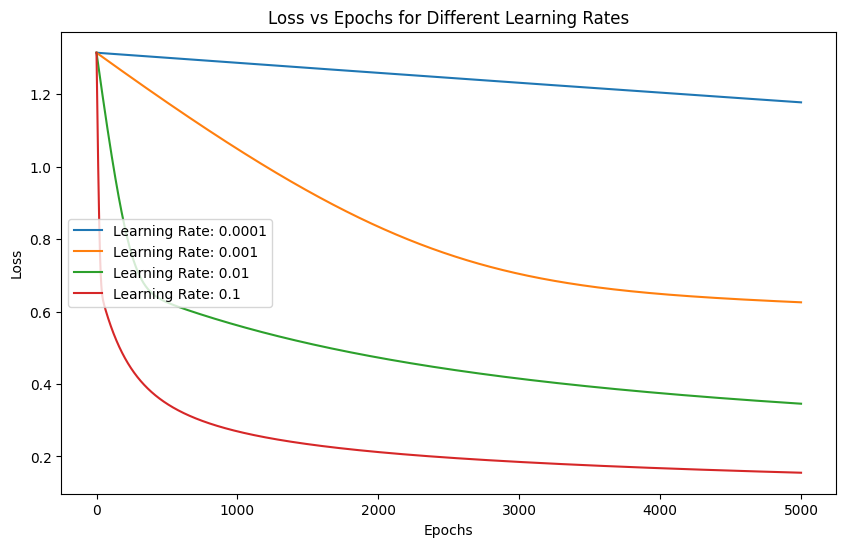

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))

for lr, losses in plot_data.items():
    ax.plot(losses, label=f"Learning Rate: {lr}")


ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs for Different Learning Rates")
ax.legend()
plt.show()